# Solving first order differential equations

### First order differential equations are differential equations of the form

$$\frac{dx}{dt} = f(x,t)$$
where $x=x(t)$.  
Examples:  
1. #### Equation for radioactive decay  

$$ \frac{dN}{dt} = -\lambda N $$
2. #### Newton's law of cooling  

$$ \frac{dT}{dt} = -\alpha (T-T_0) $$

3. #### Capacitor/Inductor in a DC circuit 

$$ R\frac{dQ}{dt} + \frac{Q}{C} = V $$

$$ L\frac{dI}{dt} + RI = V $$  

### Methods for solving:

1. Euler's method

2. Runge-Kutta method(s)

#### All such methods rely on Taylor series expansion

$$ f(t+\Delta t) = f(t) + \Delta t \frac{df}{dt} + \frac{\Delta t^2}{2!}\frac{d^2f}{dt^2} + \frac{\Delta t^3}{3!}\frac{d^3f}{dt^3} + ... $$
where all the derivatives are evaluatd at $t$.

### Euler's Method:  
#### Truncates the series at the first derivative  
$$ f(t+\Delta t) \simeq f(t) + \Delta t \frac{df}{dt} $$  
#### which is equivalent to approximating the derivative as:  
$$ \frac{df}{dt} \simeq \frac{f(t+\Delta t) - f(t)}{\Delta t} $$

### Example: Solving equation for Radioactive decay using Euler's method.  

The equation:

$$\frac{dN}{dt} = -\lambda N$$
#### Step 1.: Dimensional analysis  
There is a natural time scale $t_0 = 1/\lambda$. Define dimensionless time variable $\tau$ (time measured in units of $t_0$) as $\tau=t/t_0$. In terms of $\tau$, the equation becomes  
$$ \frac{dN}{d\tau} = -N$$  
Given the number of radioactive nuclei $N_0$ at $\tau=0$, we wish to determine $N(\tau)$. Define the instantaneous  fraction of nuclei as $n(\tau)=N(\tau)/N_0$. In terms of $n(\tau)$, the equation becomes  
$$ \frac{dn}{d\tau} = -n$$  
Given $n(0)=1$, we need to determine $n(\tau)$. We divide the interval $[0,\tau ]$ into $M$ equal intervals of size $\Delta \tau= \tau/M$. Consider any intermediate instant $\tau$ (abuse of notaion). Given $n(\tau)$, we can compute 
$n(\tau+\Delta \tau)$ using the Euler approximation  
$$ n(\tau+\Delta\tau) = n(\tau) + \Delta \tau \times \frac{dn}{d\tau} $$
Substituting for the derivative of $n$ using the differential equation gives  
$$ n(\tau+\Delta\tau) = n(\tau) - \Delta \tau \times n(\tau) $$  
This equation can be used iteratively to determine $n(\tau)$, given $n(0)=1$.

### The Code
#### Step 1: Define and initialize variables

In [1]:
number_fraction = 1. # Initial fraction of nuclei
tau = 0 # Initial instant
tau_final = 5. # Instant up to which computation is to be done
delta_tau = 0.01 # Time slice
N_slices = int(tau_final/delta_tau) # Number of slices
number_fractions = [number_fraction]
taus = [tau]

#### Step 2: Iteratively go over the difference equation

In [2]:
for step in range(0,N_slices):
    number_fraction += -(delta_tau * number_fraction)
    tau += delta_tau
    number_fractions.append(number_fraction)
    taus.append(tau)

#### Step 3: Visualize the plot  
Import plotting library 'matplotlib'

In [3]:
import matplotlib.pyplot as plt # Plotting library imported
%matplotlib inline 

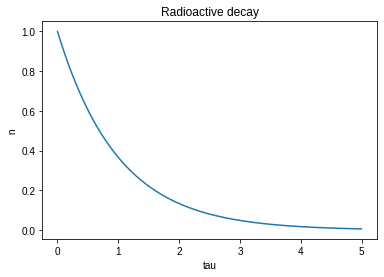

In [4]:
plt.xlabel('tau') # Label of 'x' axis
plt.ylabel('n') # Label of 'y' axis
plt.style.use('seaborn-whitegrid')
plt.title('Radioactive decay') # Title of plot
plt.plot(taus, number_fractions); # The plot command

#### Step 4: Analyze to see if the output makes sense  
In this case, we know the exact analytical solution  
$$ n(\tau) = e^{-\tau} $$
We can generate the 'correct' values of $n(\tau)$ using this function. First, we define this function


In [5]:
import math

def decay(t):
    return math.exp(-t)

In [6]:
correct_fractions = []
for i in taus:
    correct_fractions.append(decay(i))

#### Now we can plot both the fractions simultaneously

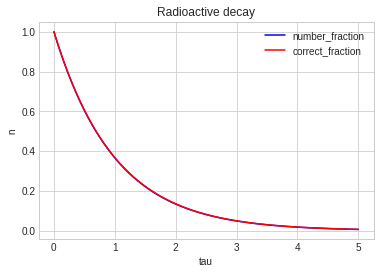

In [7]:
plt.xlabel('tau') # Label of 'x' axis
plt.ylabel('n') # Label of 'y' axis
plt.style.use('seaborn-whitegrid')
plt.title('Radioactive decay') # Title of plot
plt.plot(taus, number_fractions, '-b', label='number_fraction')
plt.plot(taus, correct_fractions, '-r', label='correct_fraction')
plt.legend();

### The Second Order Runge-Kutta Algorithm

Taylor series expansion of a function

$$ f(x+\Delta x) = f(x) + \Delta x f'(x) + \frac{1}{2!}\Delta x^2 f''(x) + \frac{1}{3!}\Delta x^3 f'''(x) + ...$$
This can be written as  
$$ f(x+\Delta x) = f(x) + \Delta x f'(x) + \frac{1}{2!}\Delta x^2 f''(x) + \mathcal{O}(\Delta x^3)$$
If we wish to have accuracy up to $\mathcal{O}(\Delta x^2)$ only, there is a clever way of doing it. This forms
the basis of the RK2 algorithm. We can rewrite the above equation as 
$$ f(x+\Delta x) = f(x) + \Delta x \left(f'(x) + \frac{1}{2!}\Delta x f''(x)\right) + \mathcal{O}(\Delta x^3)$$
Now
$$ f'(x + \Delta x/2) = f'(x) + \frac{1}{2}\Delta x f''(x) + \mathcal{O'}(\Delta x^2)$$
Therefore
$$ f'(x) + \frac{1}{2}\Delta x f''(x) = f'(x + \Delta x/2) - \mathcal{O'}(\Delta x^2)$$
Substituting, we get  
$$ f(x+\Delta x) = f(x) + \Delta x \left(f'(x + \Delta x/2) - \mathcal{O'}(\Delta x^2)\right) + \mathcal{O}(\Delta x^3) $$
The $\mathcal{O'}(\Delta x^2)$ term, when multiplied with $\Delta x$, gives a term $\mathcal{O}(\Delta x^3)$. Then,
$$ f(x+\Delta x) = f(x) + \Delta x f'(x + \Delta x/2) + \tilde{\mathcal{O}}(\Delta x^3) $$
For accuracy up to order $ \Delta x^2$, we ignore the higher order terms, to get
$$ f(x+\Delta x) \simeq f(x) + \Delta x f'(x + \Delta x/2) $$


Consider a first order differential equation of the form  
$$\frac{dx}{dt} = g(x,t)$$  
The above algorithm gives (with $f$ replaced by variable $x$ here)  
$$ x(t+\Delta t) = x(t) + \Delta t \ g\left(\ x(t+\Delta t/2), t+\Delta t/2 \ \right) $$  
In this form, the equation does not allow us to determine $x(t+\Delta t)$, given $x(t)$. Since we want 
accuracy up to $\mathcal{O}(\Delta t^2)$, we can approximate $x(t+\Delta t/2)$ on RHS by $x(t)+(\Delta t/2) \ \dot{x} = x(t) + (\Delta t/2) \ g(x,t)$. Substituting, we get  
$$ x(t+\Delta t) = x(t) + \Delta t \ g\left(\ x(t) + (\Delta t/2) \ g(x,t), \ t+\Delta t/2 \ \right) $$  

This can be reduced to the following algorithm:

$$
\begin{align}
k_1 &= \Delta t \ g(x,t) \\
k_2 &= \Delta t \ g\left(x+k_1/2, t+\Delta t/2\right) \\
x(t+\Delta t) &= x(t) + k_2
\end{align}
$$

### Exercise: The Parachute Problem

Model the motion of an object falling with a parachute such that the air drag on the object varies as the 
square of velocity. Identifying suitable natural scales, write down a dimensionless differential equation 
describing the velocity of the object as a function of time and solve this equation, assuming the object starts to 
fall from rest. Try both the Euler and the RK2 algorithms and note the differences. 